In [1]:
import os
import sys
import pandas as pd

# Add the paths to the sys.path
sys.path.append('C:/Users/MMM/Documents/10 Academy File/KAIM-Week-2/Db_connection')
sys.path.append('C:/Users/MMM/Documents/10 Academy File/KAIM-Week-2/src')

# Now, you can import your custom modules
from connection import Postgres_Connection
from utils import missing_values_table, convert_bytes_to_megabytes




Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [2]:
db = Postgres_Connection(dbname='my_database', user='postgres', password='123')
db.connect()

# Example query
query = "SELECT * FROM public.xdr_data"
result = db.execute_query(query)

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head())  # Display the first few rows of the DataFrame

# Close the connection when done
db.close_connection()


Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [3]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Missing Values in df:
                                          Missing Values  Percentage
Nb of sec with 37500B < Vol UL                    130254   86.835421
Nb of sec with 6250B < Vol UL < 37500B            111843   74.561503
Nb of sec with 125000B < Vol DL                    97538   65.024900
TCP UL Retrans. Vol (Bytes)                        96649   64.432237
Nb of sec with 31250B < Vol DL < 125000B           93586   62.390251
Nb of sec with 1250B < Vol UL < 6250B              92894   61.928920
Nb of sec with 6250B < Vol DL < 31250B             88317   58.877607
TCP DL Retrans. Vol (Bytes)                        88146   58.763608
HTTP UL (Bytes)                                    81810   54.539636
HTTP DL (Bytes)                                    81474   54.315638
Avg RTT DL (ms)                                    27829   18.552543
Avg RTT UL (ms)                                    27812   18.541210
Last Location Name                                  1153    0.768662
MSISDN/Numbe

In [17]:
df['x'] = df['HTTP DL (Bytes)'].apply(convert_bytes_to_megabytes)
print(df)


           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [30]:
import psycopg2

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="my_database",  # Replace with your database name
    user="postgres",       # Replace with your PostgreSQL username
    password="123",        # Replace with your PostgreSQL password
    host="localhost",      # Replace with your host
    port="5432"            # Replace with your port
)

# Create a cursor object
cur = conn.cursor()

# 1. Identify the top 10 handsets used by customers
top_10_handsets_query = """
    SELECT "Handset Type", COUNT(*) AS usage_count
    FROM public.xdr_data
    GROUP BY "Handset Type"
    ORDER BY usage_count DESC
    LIMIT 10;
"""
cur.execute(top_10_handsets_query)
top_10_handsets = cur.fetchall()

print("Top 10 Handsets:")
for row in top_10_handsets:
    print(f"Handset Type: {row[0]}, Usage Count: {row[1]}")

# 2. Identify the top 3 handset manufacturers
top_3_manufacturers_query = """
    SELECT "Handset Manufacturer", COUNT(*) AS usage_count
    FROM public.xdr_data
    GROUP BY "Handset Manufacturer"
    ORDER BY usage_count DESC
    LIMIT 3;
"""
cur.execute(top_3_manufacturers_query)
top_3_manufacturers = cur.fetchall()

print("\nTop 3 Manufacturers:")
for row in top_3_manufacturers:
    print(f"Manufacturer: {row[0]}, Usage Count: {row[1]}")

# 3. Identify the top 5 handsets per top 3 manufacturers using parameterized queries
print("\nTop 5 Handsets per Top 3 Manufacturers:")
for manufacturer in top_3_manufacturers:
    manufacturer_name = manufacturer[0]
    top_5_handsets_query = """
        SELECT "Handset Type", COUNT(*) AS usage_count
        FROM public.xdr_data
        WHERE "Handset Manufacturer" = %s
        GROUP BY "Handset Type"
        ORDER BY usage_count DESC
        LIMIT 5;
    """
    cur.execute(top_5_handsets_query, (manufacturer_name,))
    top_5_handsets_per_manufacturer = cur.fetchall()
    
    print(f"\nTop 5 Handsets for {manufacturer_name}:")
    for row in top_5_handsets_per_manufacturer:
        print(f"Handset Type: {row[0]}, Usage Count: {row[1]}")

# Close the cursor and connection
cur.close()
conn.close()

# Example Recommendation Based on the Analysis
print("\nRecommendation:")
print("""
Based on the analysis, the majority of customers use handsets from Apple and Huawei. 
This indicates that a significant portion of the customer base prefers premium smartphones. 

**Marketing Recommendation:**
1. **Apple and Huawei Promotions**: Target promotions and offers around Apple and Huawei devices as they account for a significant portion of the user base.
2. **Partnership with Apple and Huawei**: Form partnerships with Apple and Huawei to create exclusive offers or bundles for customers who use their handsets.
3. **Undefined Devices**: Investigate the 'undefined' category, which has a notable usage count. There might be opportunities to capture more customer data or improve device identification processes.
""")


Top 10 Handsets:
Handset Type: Huawei B528S-23A, Usage Count: 19752
Handset Type: Apple iPhone 6S (A1688), Usage Count: 9419
Handset Type: Apple iPhone 6 (A1586), Usage Count: 9023
Handset Type: undefined, Usage Count: 8987
Handset Type: Apple iPhone 7 (A1778), Usage Count: 6326
Handset Type: Apple iPhone Se (A1723), Usage Count: 5187
Handset Type: Apple iPhone 8 (A1905), Usage Count: 4993
Handset Type: Apple iPhone Xr (A2105), Usage Count: 4568
Handset Type: Samsung Galaxy S8 (Sm-G950F), Usage Count: 4520
Handset Type: Apple iPhone X (A1901), Usage Count: 3813

Top 3 Manufacturers:
Manufacturer: Apple, Usage Count: 59565
Manufacturer: Samsung, Usage Count: 40839
Manufacturer: Huawei, Usage Count: 34423

Top 5 Handsets per Top 3 Manufacturers:

Top 5 Handsets for Apple:
Handset Type: Apple iPhone 6S (A1688), Usage Count: 9419
Handset Type: Apple iPhone 6 (A1586), Usage Count: 9023
Handset Type: Apple iPhone 7 (A1778), Usage Count: 6326
Handset Type: Apple iPhone Se (A1723), Usage Count

In [18]:
import psycopg2
import pandas as pd

# Database connection details
db_config = {
    'dbname': 'my_database',
    'user': 'postgres',
    'password': '123',
    'host': 'localhost',
    'port': '5432'
}

# Establish connection to the database
conn = psycopg2.connect(**db_config)

# Define the SQL query
query = """
SELECT 
    "MSISDN/Number" AS user_id,
    COUNT(*) AS number_of_xdr_sessions,
    SUM("Dur. (ms)") AS total_session_duration_ms,
    SUM("Total DL (Bytes)") AS total_download_data_bytes,
    SUM("Total UL (Bytes)") AS total_upload_data_bytes,
    SUM("Social Media DL (Bytes)") AS social_media_download_bytes,
    SUM("Social Media UL (Bytes)") AS social_media_upload_bytes,
    SUM("Google DL (Bytes)") AS google_download_bytes,
    SUM("Google UL (Bytes)") AS google_upload_bytes,
    SUM("Youtube DL (Bytes)") AS youtube_download_bytes,
    SUM("Youtube UL (Bytes)") AS youtube_upload_bytes,
    SUM("Netflix DL (Bytes)") AS netflix_download_bytes,
    SUM("Netflix UL (Bytes)") AS netflix_upload_bytes,
    SUM("Gaming DL (Bytes)") AS gaming_download_bytes,
    SUM("Gaming UL (Bytes)") AS gaming_upload_bytes,
    SUM("Other DL (Bytes)") AS other_download_bytes,
    SUM("Other UL (Bytes)") AS other_upload_bytes
FROM public.xdr_data
GROUP BY "MSISDN/Number"
ORDER BY number_of_xdr_sessions DESC;
"""

# Execute the query and fetch results
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the DataFrame or save it to a file
print(df.head())  # Print first few rows
# df.to_csv('user_behavior_summary.csv', index=False)  # Optionally save to CSV


C:\Users\MMM\AppData\Local\Temp\ipykernel_16012\832039506.py:42: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


        user_id  number_of_xdr_sessions  total_session_duration_ms  \
0           NaN                    1066                 72446396.0   
1  3.362632e+10                      18                  8791927.0   
2  3.362578e+10                      17                 18553754.0   
3  3.361489e+10                      17                  9966898.0   
4  3.365973e+10                      16                  4035428.0   

   total_download_data_bytes  total_upload_data_bytes  \
0               4.869236e+11             4.432530e+10   
1               7.301517e+09             6.696507e+08   
2               7.770043e+09             7.295774e+08   
3               8.156743e+09             6.894830e+08   
4               7.081602e+09             6.242603e+08   

   social_media_download_bytes  social_media_upload_bytes  \
0                 1.937715e+09               3.610230e+07   
1                 4.274384e+07               6.309420e+05   
2                 2.656412e+07               5.713790

In [36]:
#select the most necessary columns from the given data 
# List of columns to keep
columns_to_keep = [
    'Dur. (ms)', 'Start', 'End', 'IMSI', 'MSISDN/Number',
    'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)',
    'Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)','Handset Type','Handset Manufacturer'
]

# Drop columns not in the list of columns to keep
data_cleaned = df[columns_to_keep]



In [37]:
data_cleaned.head()

,Dur. (ms),Start,End,IMSI,MSISDN/Number,Avg RTT DL (ms),Avg Bearer TP DL (kbps),TCP DL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Handset Type,Handset Manufacturer
62,336160.0,4/21/2019 2:55,4/25/2019 0:17,2.082018e+14,3.376353e+10,52.000000,14621.0,1.432000e+03,2.818130e+05,3.964900e+04,632600264.0,46797611.0,2306074.0,22833724.0,18426843.0,Huawei B528S-23A,Huawei
65,320001.0,4/21/2019 8:26,4/25/2019 1:20,2.082017e+14,3.366364e+10,30.000000,47.0,2.080991e+07,1.144710e+08,3.242301e+06,597244693.0,18261248.0,2070762.0,12074277.0,20574393.0,Samsung Galaxy S6 Edge (Sm-G925X),Samsung
66,316419.0,4/21/2019 8:54,4/25/2019 0:48,2.082019e+14,3.366010e+10,109.795706,61.0,2.080991e+07,1.144710e+08,3.242301e+06,538809148.0,50065095.0,2749089.0,5550520.0,19227109.0,Samsung Galaxy S9 Sm-G960F Ds,Samsung
67,329003.0,4/21/2019 9:19,4/25/2019 4:42,2.082021e+14,3.365079e+10,109.795706,11.0,2.080991e+07,1.144710e+08,3.242301e+06,162196572.0,29436200.0,1585996.0,10185468.0,15416344.0,Samsung Galaxy A6 Sm-A600Fn Ds,Samsung
68,314961.0,4/21/2019 10:09,4/25/2019 1:39,2.082014e+14,3.366274e+10,853.000000,11517.0,7.659680e+05,9.564415e+06,4.161610e+05,93360974.0,50576233.0,2432521.0,22191188.0,15879318.0,Samsung Galaxy A8 (2018),Samsung


In [35]:
data_cleaned.shape  

(127925, 17)

In [38]:
data_cleaned.isnull().sum()

Dur. (ms)                        0
Start                            1
End                              1
IMSI                             0
MSISDN/Number                    0
Avg RTT DL (ms)                  0
Avg Bearer TP DL (kbps)          0
TCP DL Retrans. Vol (Bytes)      0
HTTP DL (Bytes)                  0
HTTP UL (Bytes)                  0
Total DL (Bytes)                 0
Total UL (Bytes)                 0
Social Media DL (Bytes)          0
Youtube DL (Bytes)               0
Netflix DL (Bytes)               0
Handset Type                   484
Handset Manufacturer           484
dtype: int64

<Axes: >

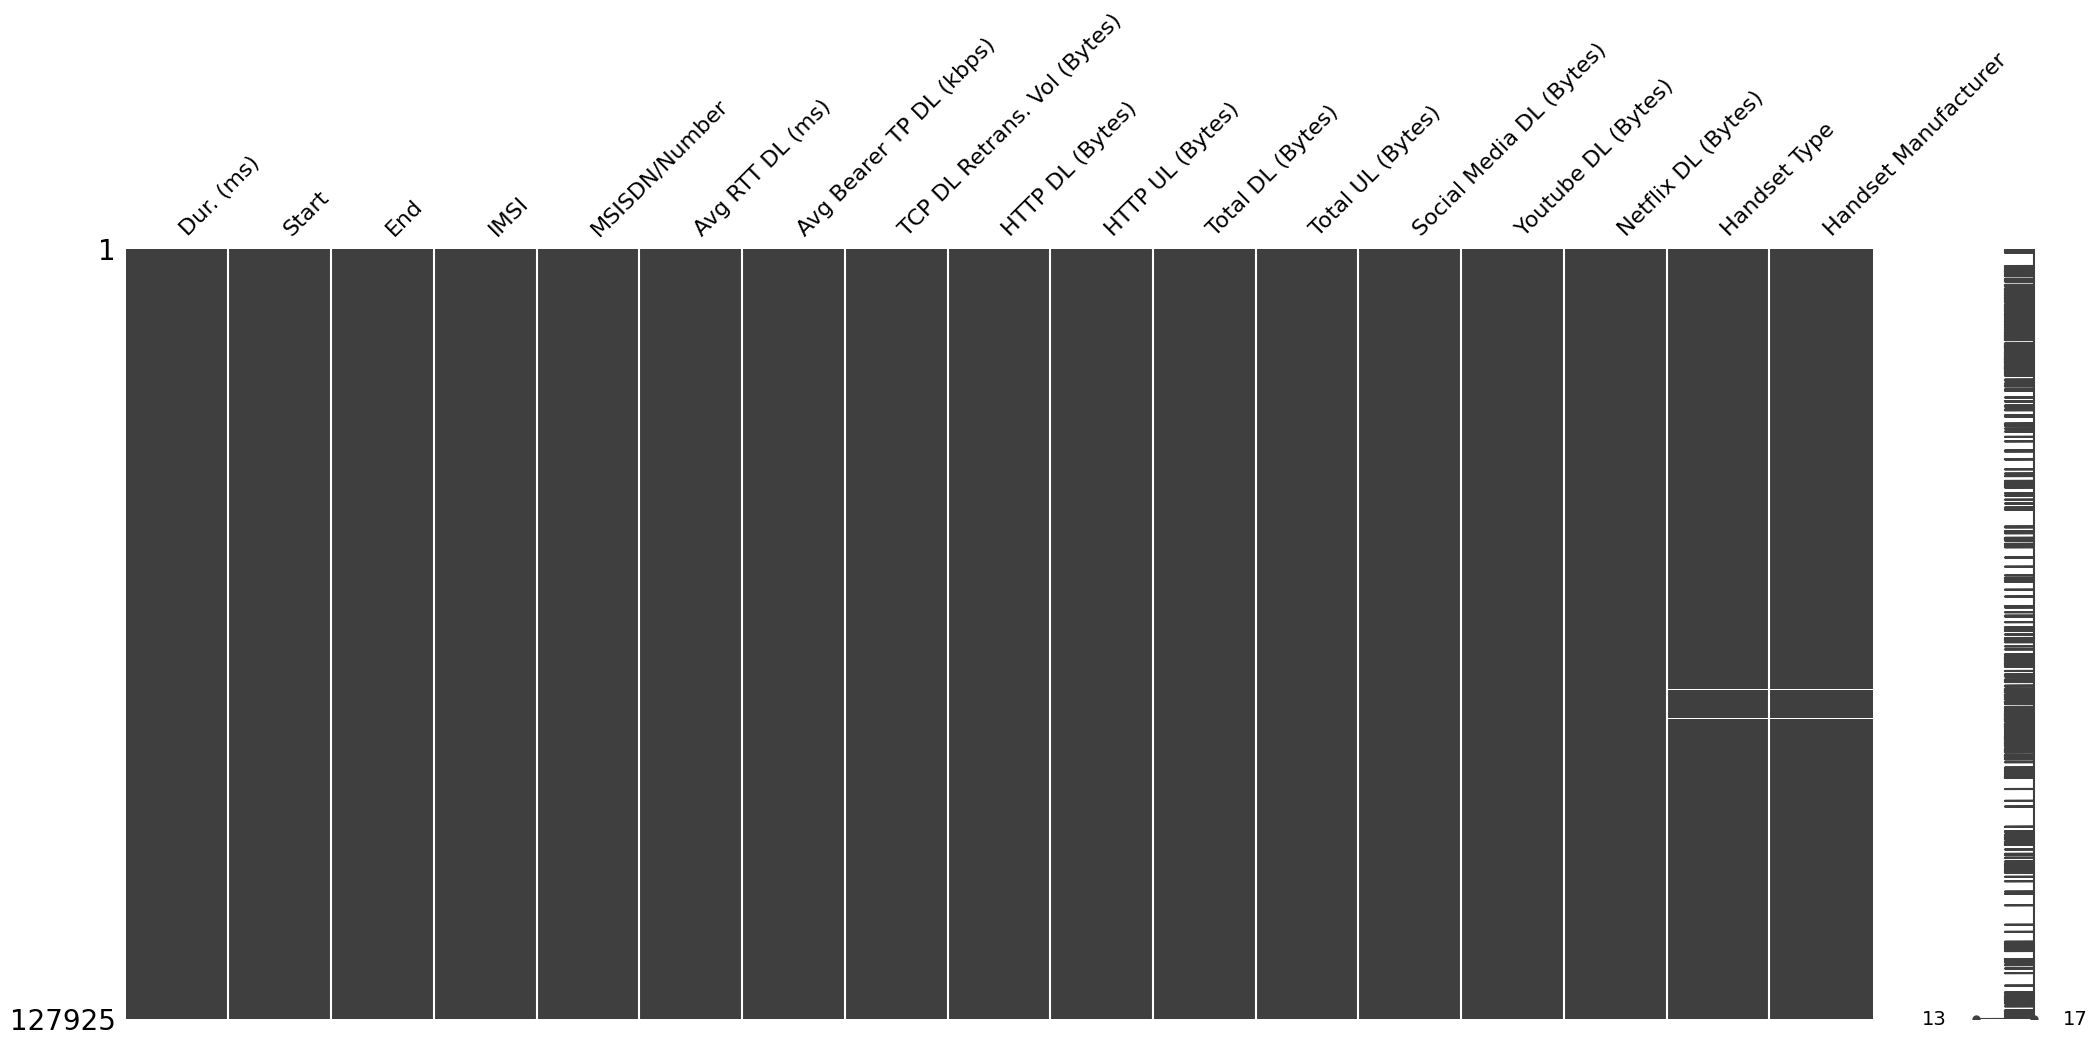

In [41]:
import missingno as msno
msno.matrix(data_cleaned)

In [42]:
# Fill 'HTTP UL' and 'HTTP DL' with 0 (assuming missing values indicate no data transfer)
data_cleaned['HTTP UL (Bytes)'].fillna(0, inplace=True)
data_cleaned['HTTP DL (Bytes)'].fillna(0, inplace=True)

# Fill 'TCP DL Retrans. Vol (Bytes)' using linear interpolation (useful if time-dependent)
data_cleaned['TCP DL Retrans. Vol (Bytes)'].interpolate(method='linear', inplace=True)

# Fill 'Avg RTT DL (ms)' with the median or use group-based imputation
data_cleaned['Avg RTT DL (ms)'].fillna(data_cleaned['Avg RTT DL (ms)'].median(), inplace=True)
# Fill IMSI and MSISDN/Number with placeholder values
data_cleaned['IMSI'].fillna('Unknown_IMSI', inplace=True)
data_cleaned['MSISDN/Number'].fillna('Unknown_MSISDN', inplace=True)
# Check the remaining columns
data_cleaned['Handset Type'].dropna()
data_cleaned['Handset Manufacturer'].dropna()

C:\Users\MMM\AppData\Local\Temp\ipykernel_16012\3922509609.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['HTTP UL (Bytes)'].fillna(0, inplace=True)
C:\Users\MMM\AppData\Local\Temp\ipykernel_16012\3922509609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['HTTP UL (Bytes)'].fillna(0, inplace=True)
C:\Users\MM

62         Huawei
65        Samsung
66        Samsung
67        Samsung
68        Samsung
           ...   
149994    Samsung
149996      Apple
149997      Apple
149998      Apple
149999     Huawei
Name: Handset Manufacturer, Length: 127441, dtype: object

In [43]:
data_cleaned.isnull().sum()

Dur. (ms)                        0
Start                            1
End                              1
IMSI                             0
MSISDN/Number                    0
Avg RTT DL (ms)                  0
Avg Bearer TP DL (kbps)          0
TCP DL Retrans. Vol (Bytes)      0
HTTP DL (Bytes)                  0
HTTP UL (Bytes)                  0
Total DL (Bytes)                 0
Total UL (Bytes)                 0
Social Media DL (Bytes)          0
Youtube DL (Bytes)               0
Netflix DL (Bytes)               0
Handset Type                   484
Handset Manufacturer           484
dtype: int64

<Axes: >

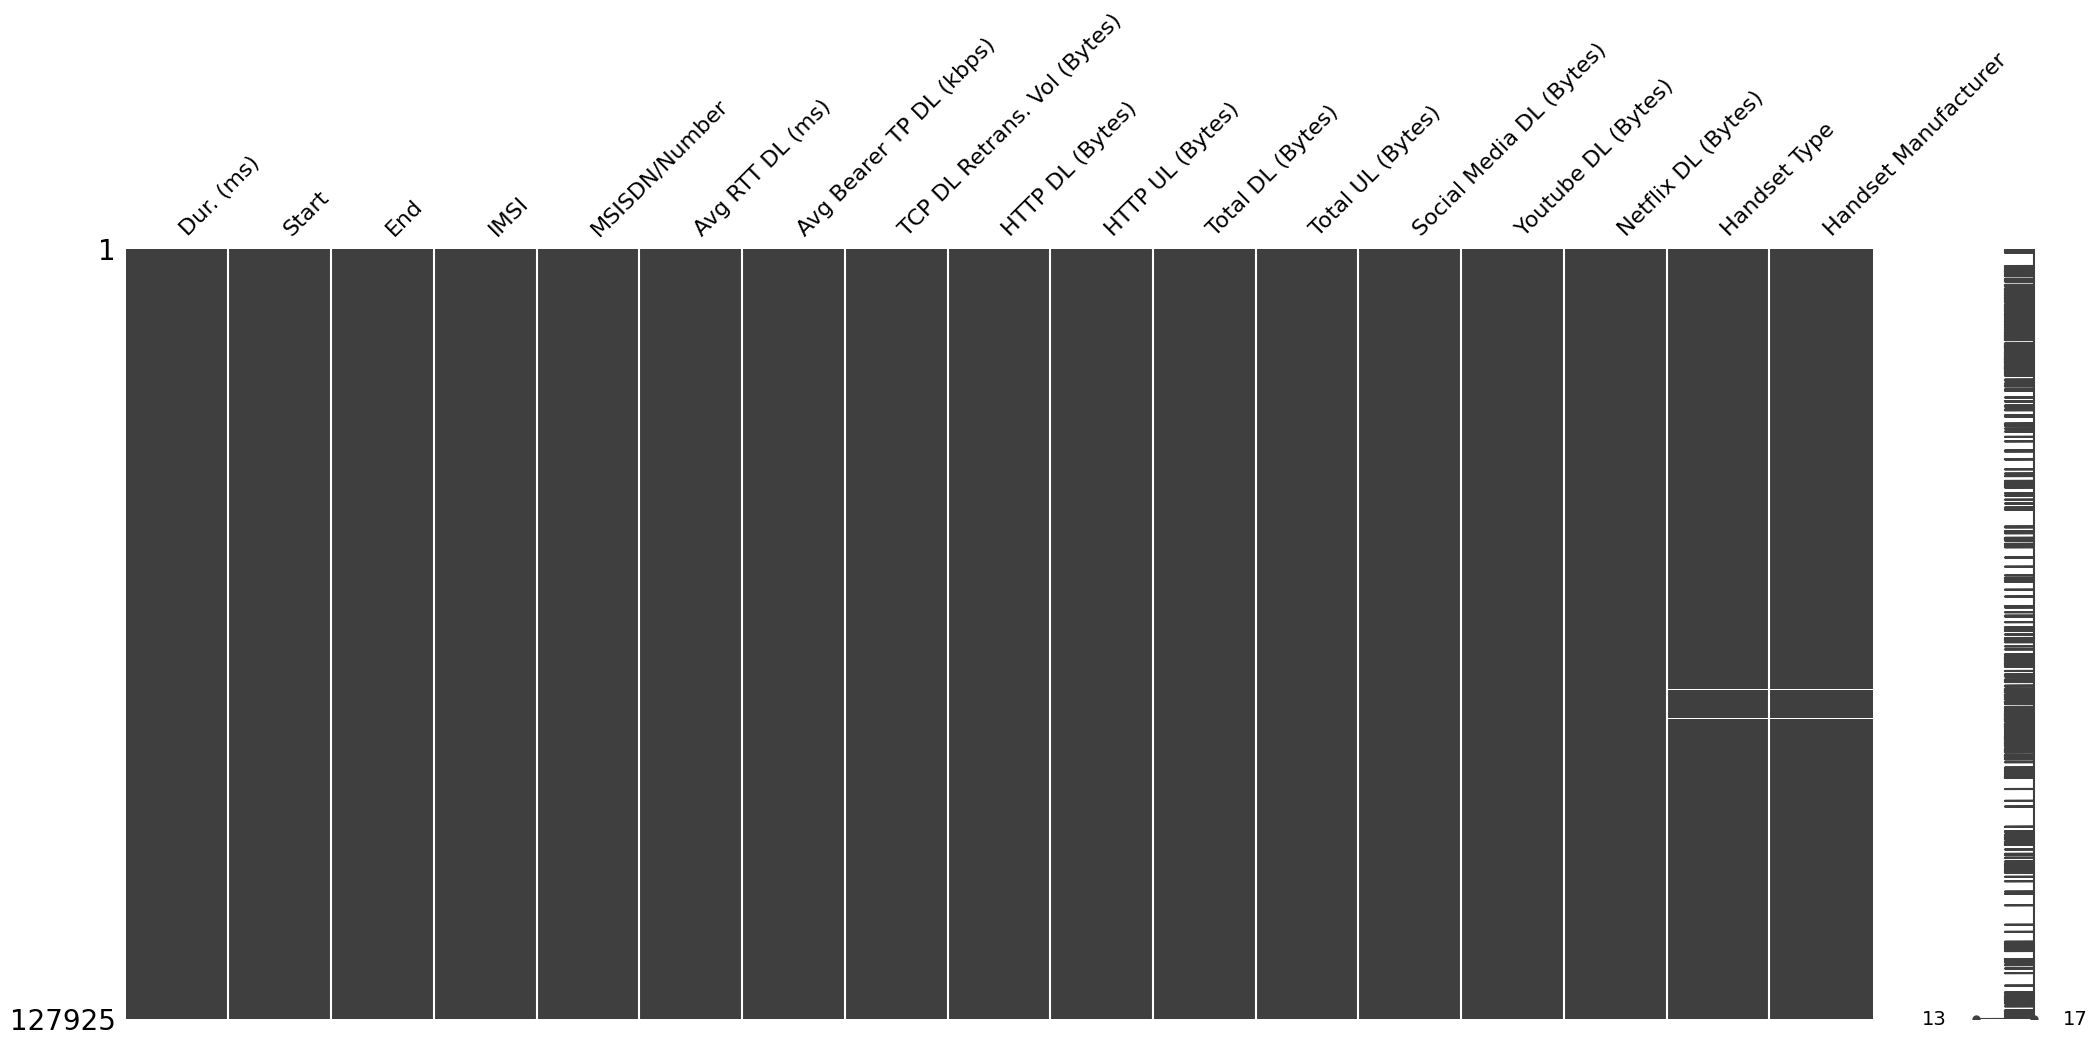

In [44]:
import missingno as msno
msno.matrix(data_cleaned)

In [45]:
df_cleaned =data_cleaned.dropna()

<Axes: >

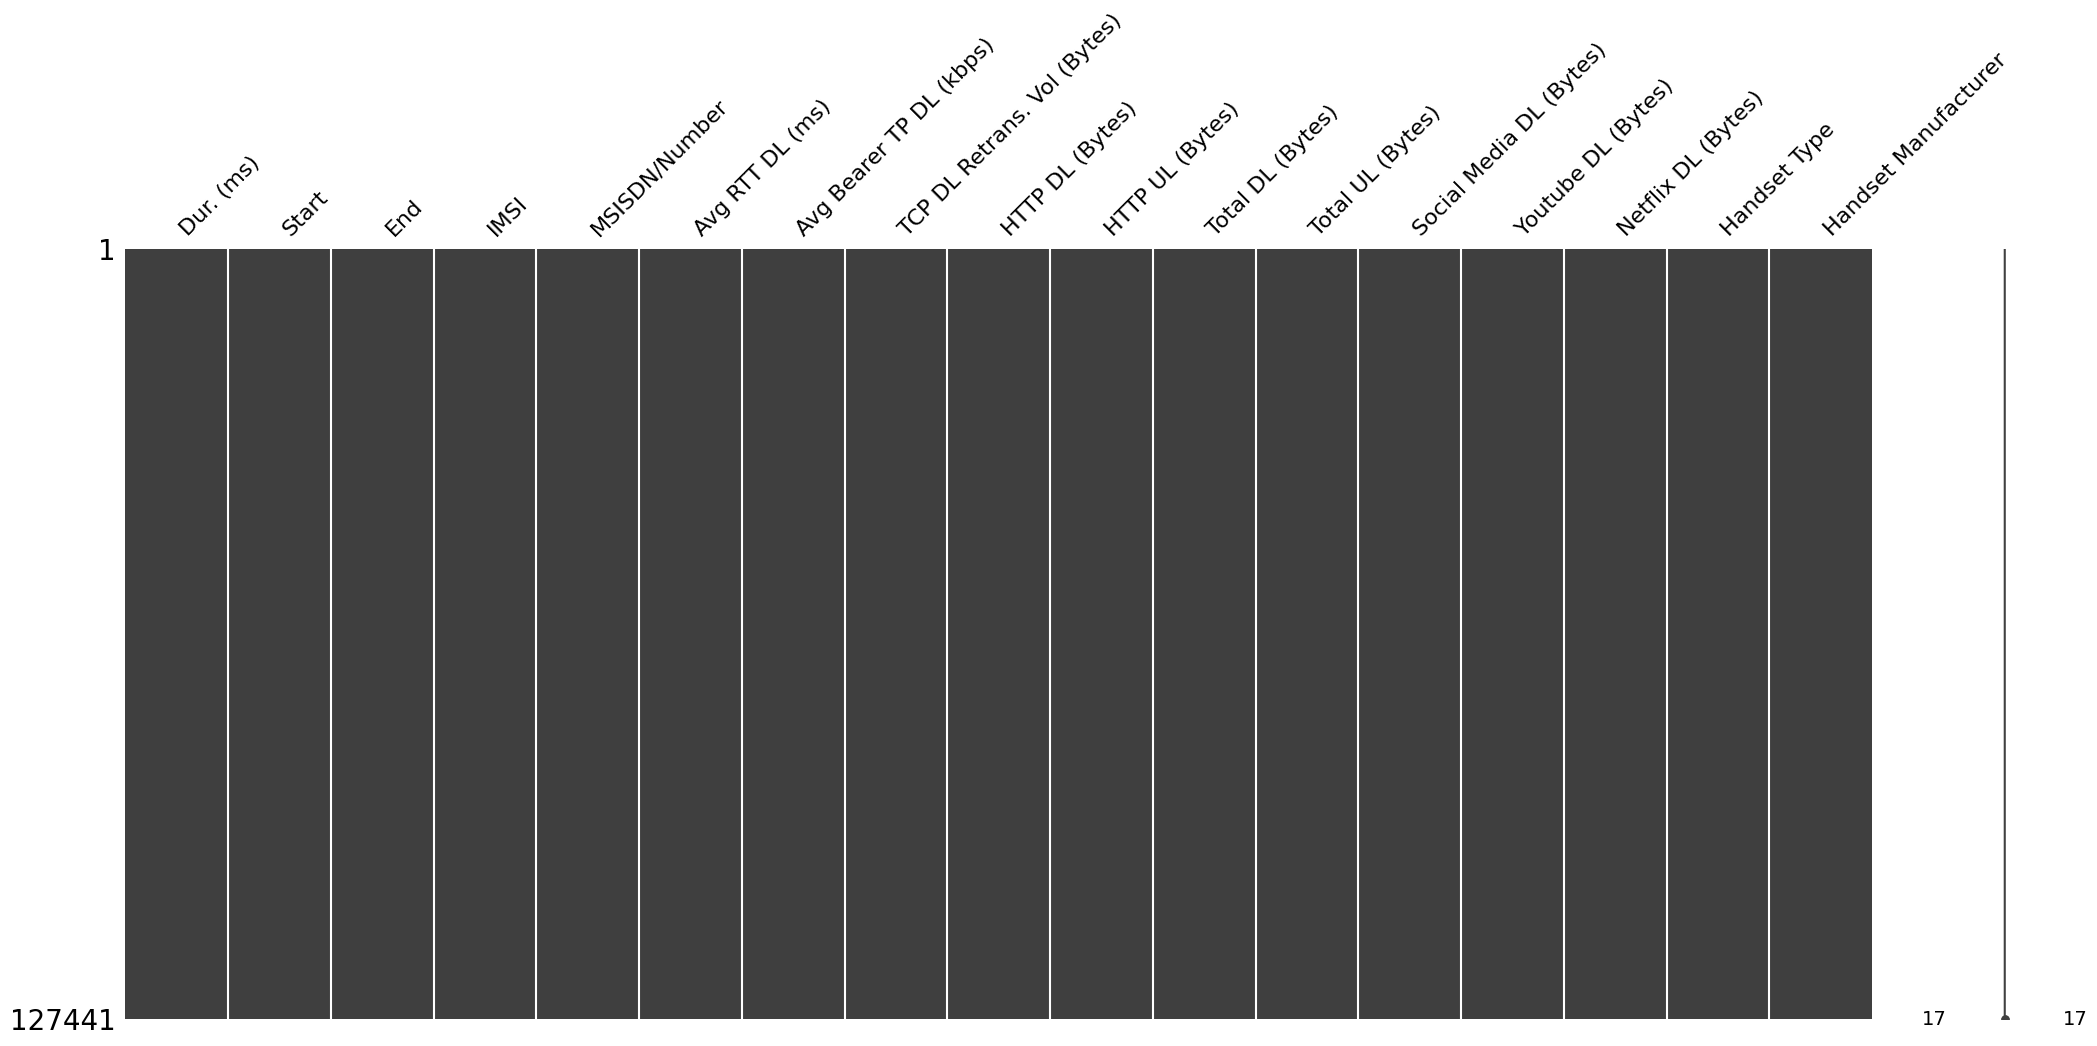

In [46]:
import missingno as msno
msno.matrix(df_cleaned)

In [47]:
df_cleaned.isnull().sum()

Dur. (ms)                      0
Start                          0
End                            0
IMSI                           0
MSISDN/Number                  0
Avg RTT DL (ms)                0
Avg Bearer TP DL (kbps)        0
TCP DL Retrans. Vol (Bytes)    0
HTTP DL (Bytes)                0
HTTP UL (Bytes)                0
Total DL (Bytes)               0
Total UL (Bytes)               0
Social Media DL (Bytes)        0
Youtube DL (Bytes)             0
Netflix DL (Bytes)             0
Handset Type                   0
Handset Manufacturer           0
dtype: int64

In [48]:
df_cleaned.describe()

,Dur. (ms),IMSI,MSISDN/Number,Avg RTT DL (ms),Avg Bearer TP DL (kbps),TCP DL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes)
count,127441.000000,1.274410e+05,1.274410e+05,127441.000000,127441.000000,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05
mean,102064.302815,2.082016e+14,3.370039e+10,82.690310,8311.082862,1.487741e+07,8.402911e+07,2.453018e+06,4.546629e+08,4.110470e+07,1.797135e+06,1.162221e+07,1.161900e+07
std,62527.376090,1.342770e+09,4.698706e+08,122.202084,16421.878078,1.057173e+07,8.907959e+07,2.195965e+06,2.441922e+08,1.126178e+07,1.035315e+06,6.706844e+06,6.724916e+06
min,7142.000000,2.082001e+14,3.360100e+10,0.000000,0.000000,6.000000e+00,4.000000e+01,4.000000e+01,7.114041e+06,7.377304e+06,1.200000e+01,5.300000e+01,4.200000e+01
25%,57027.000000,2.082010e+14,3.365076e+10,34.000000,41.000000,1.767476e+06,3.287718e+06,3.731990e+05,2.430460e+08,3.319434e+07,9.012140e+05,5.825528e+06,5.776912e+06
50%,86400.000000,2.082015e+14,3.366355e+10,51.000000,57.000000,2.080991e+07,1.144710e+08,3.242301e+06,4.560973e+08,4.114626e+07,1.795686e+06,1.158726e+07,1.163157e+07
75%,137283.000000,2.082018e+14,3.368319e+10,109.795706,7726.000000,2.080991e+07,1.144710e+08,3.242301e+06,6.661297e+08,4.901915e+07,2.697308e+06,1.743836e+07,1.746008e+07
max,347695.000000,2.082522e+14,4.188282e+10,1787.000000,85214.000000,3.391790e+08,2.058871e+09,4.169789e+07,9.029696e+08,7.483343e+07,3.586064e+06,2.325910e+07,2.325886e+07


In [49]:
import numpy as np

# Define the columns to check
columns_to_check = [
    'Avg RTT DL (ms)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
    'Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)'
]

# Cap values above the 95th percentile and floor values below the 5th percentile
for column in columns_to_check:
    # Compute the 95th and 5th percentiles
    upper_bound = df_cleaned[column].quantile(0.95)
    lower_bound = df_cleaned[column].quantile(0.05)
    
    # Cap and floor the values
    df_cleaned[column] = np.where(df_cleaned[column] > upper_bound, upper_bound, df_cleaned[column])
    df_cleaned[column] = np.where(df_cleaned[column] < lower_bound, lower_bound, df_cleaned[column])

C:\Users\MMM\AppData\Local\Temp\ipykernel_16012\3928355647.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = np.where(df_cleaned[column] > upper_bound, upper_bound, df_cleaned[column])
C:\Users\MMM\AppData\Local\Temp\ipykernel_16012\3928355647.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = np.where(df_cleaned[column] < lower_bound, lower_bound, df_cleaned[column])
C:\Users\MMM\AppData\Local\Temp\ipykernel_16012\3928355647.py:16: SettingWithCopyWarning: 
A v

In [50]:
# Check the updated data
df_cleaned.shape

(127441, 17)

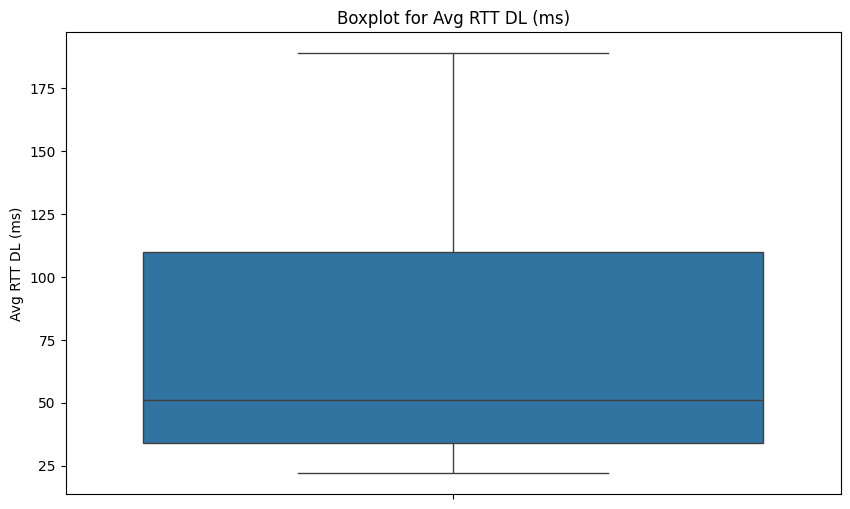

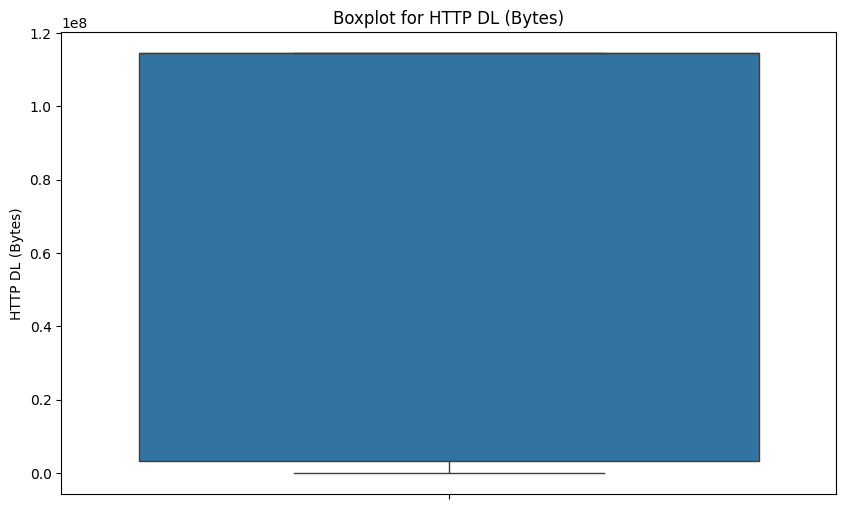

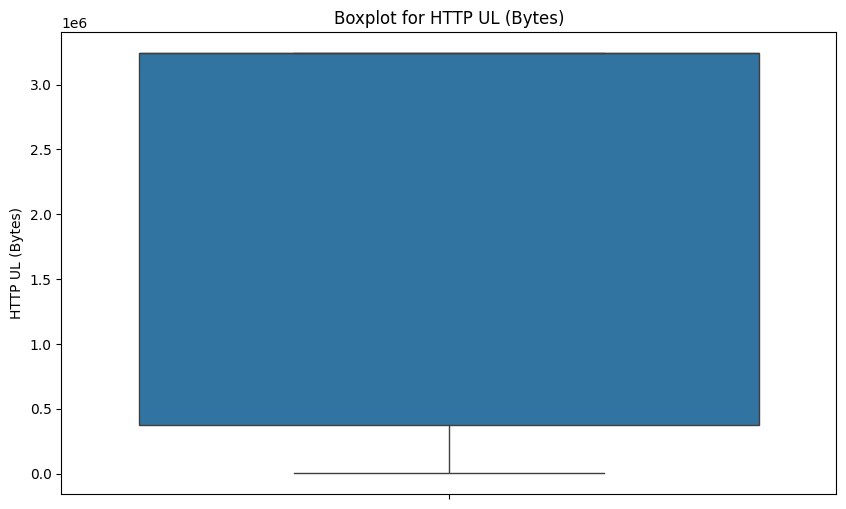

In [51]:
#to identify the outliers from the given columns
import matplotlib.pyplot as plt
import seaborn as sns
#: Plotting boxplots to detect outliers for a specific column
columns_to_check = ['Avg RTT DL (ms)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)']

# Plot boxplots for each column
for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df_cleaned[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [52]:
df_cleaned.describe()

,Dur. (ms),IMSI,MSISDN/Number,Avg RTT DL (ms),Avg Bearer TP DL (kbps),TCP DL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes)
count,127441.000000,1.274410e+05,1.274410e+05,127441.000000,127441.000000,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05,1.274410e+05
mean,102064.302815,2.082016e+14,3.370039e+10,68.853624,8311.082862,1.487741e+07,7.673567e+07,2.258822e+06,4.546629e+08,4.110470e+07,1.796988e+06,1.162188e+07,1.161792e+07
std,62527.376090,1.342770e+09,4.698706e+08,44.601145,16421.878078,1.057173e+07,5.219256e+07,1.409825e+06,2.441922e+08,1.126178e+07,1.020651e+06,6.609167e+06,6.629817e+06
min,7142.000000,2.082001e+14,3.360100e+10,22.000000,0.000000,6.000000e+00,9.094000e+03,3.301000e+03,7.114041e+06,7.377304e+06,1.786660e+05,1.177809e+06,1.149996e+06
25%,57027.000000,2.082010e+14,3.365076e+10,34.000000,41.000000,1.767476e+06,3.287718e+06,3.731990e+05,2.430460e+08,3.319434e+07,9.012140e+05,5.825528e+06,5.776912e+06
50%,86400.000000,2.082015e+14,3.366355e+10,51.000000,57.000000,2.080991e+07,1.144710e+08,3.242301e+06,4.560973e+08,4.114626e+07,1.795686e+06,1.158726e+07,1.163157e+07
75%,137283.000000,2.082018e+14,3.368319e+10,109.795706,7726.000000,2.080991e+07,1.144710e+08,3.242301e+06,6.661297e+08,4.901915e+07,2.697308e+06,1.743836e+07,1.746008e+07
max,347695.000000,2.082522e+14,4.188282e+10,189.000000,85214.000000,3.391790e+08,1.144710e+08,3.242301e+06,9.029696e+08,7.483343e+07,3.403476e+06,2.206747e+07,2.207124e+07


In [54]:
df_cleaned.shape

(127441, 17)

In [55]:
# Calculate total download and upload data per user
total_dl_ul = df_cleaned.groupby('IMSI').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_dl_ul.rename(columns={'Total DL (Bytes)': 'Total Download (Bytes)', 'Total UL (Bytes)': 'Total Upload (Bytes)'}, inplace=True)
print("Total Download and Upload Data per User:")
print(total_dl_ul.head())

Total Download and Upload Data per User:
           IMSI  Total Download (Bytes)  Total Upload (Bytes)
0  2.082001e+14              31376981.0            53794658.0
1  2.082001e+14             392918313.0            33583272.0
2  2.082001e+14             262611656.0            39771933.0
3  2.082001e+14             665593389.0            39212281.0
4  2.082001e+14             886414496.0            70799015.0


In [57]:
# List of applications for both DL and UL data
applications = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']

# Create a list of column names for both DL and UL
application_columns = [f'{app} DL (Bytes)' for app in applications] + [f'{app} UL (Bytes)' for app in applications]

# Ensure that the columns exist in the DataFrame before aggregating
existing_columns = [col for col in application_columns if col in df_cleaned.columns]

# Calculate the total data volume per application per user (for both DL and UL)
app_data_volumes = df_cleaned.groupby('IMSI').agg({
    **{app: 'sum' for app in existing_columns}
}).reset_index()

# Display the first few rows of the aggregated data
print("Total Data Volume per Application per User:")
print(app_data_volumes.head())


Total Data Volume per Application per User:
           IMSI  Social Media DL (Bytes)  Youtube DL (Bytes)  \
0  2.082001e+14                3073697.0           5556563.0   
1  2.082001e+14                2542767.0          22067470.0   
2  2.082001e+14                1688996.0           1399218.0   
3  2.082001e+14                 996268.0          14819244.0   
4  2.082001e+14                3725468.0          22423599.0   

   Netflix DL (Bytes)  
0          15305361.0  
1          10065639.0  
2           8650443.0  
3          15494900.0  
4          11125776.0  


In [59]:
# Count the number of xDR sessions per user
session_counts = df_cleaned.groupby('IMSI')['Bearer Id'].count().reset_index(name='Number of xDR Sessions')

# Display the first few rows of the session counts DataFrame
print("Number of xDR Sessions per User:")
print(session_counts.head())


KeyError: 'Column not found: Bearer Id'

Missing Values & Outliers

Missing Values:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps

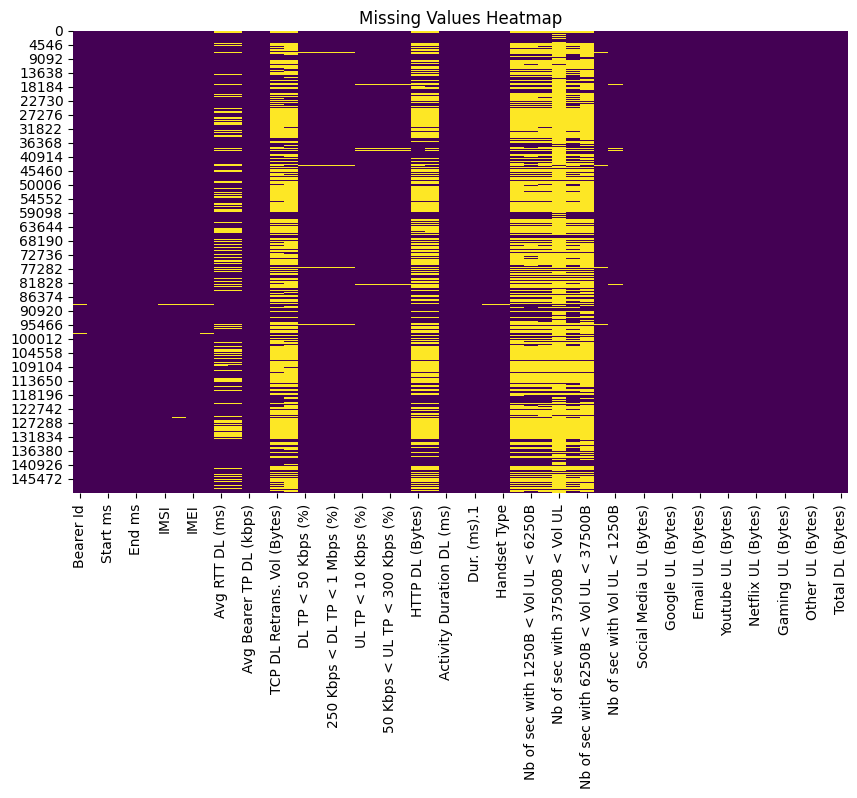

In [4]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing data using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [5]:
# Print the column names and their data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

1.2 Treat Missing Values:

In [6]:
# Treat missing values for numerical columns by replacing with mean
df_numeric = df.select_dtypes(include=['float64', 'int64'])

for column in df_numeric.columns:
    df[column].fillna(df[column].mean(), inplace=True)

print("Missing values filled with mean.")


C:\Users\MMM\AppData\Local\Temp\ipykernel_16012\1497327293.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Missing values filled with mean.


In [10]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


1.3 Detect Outliers:

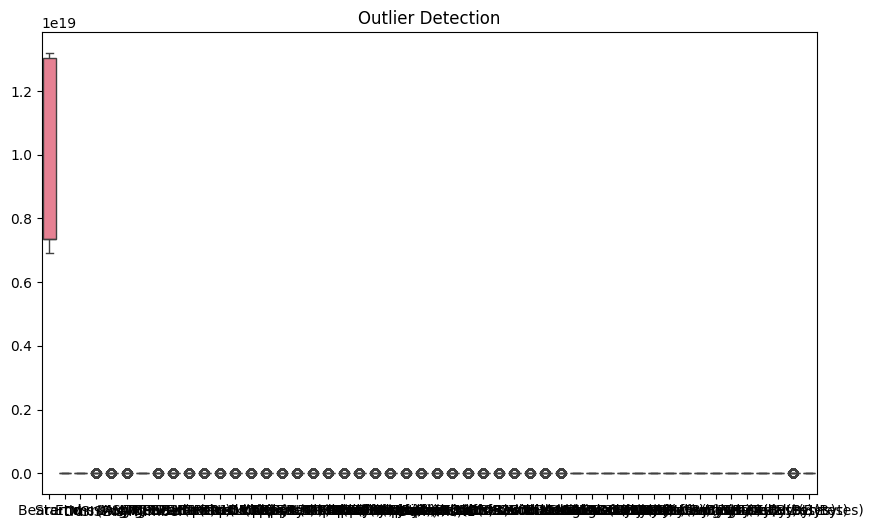

In [7]:
# Detect outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Outlier Detection")
plt.show()


2. Describe Relevant Variables & Data Types

In [39]:
# Print the first few rows of the DataFrame
print(df.head())


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  9.16456699548519E+015  ...           2501332.0           8198936.0   
1                L77566A  ...          19111729.0          18338413.0   

In [15]:
# Describe the relevant variables
print(df.info())  # Check data types
print(df.describe())  # Get summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

3. Segment Users into Decile Classes


In [14]:
# List of columns you expect
expected_columns = ['total_DL', 'total_UL', 'total_duration', 'Social Media', 'Google', 'YouTube', 'Netflix', 'Gaming', 'Other']

# Check which expected columns are present in the DataFrame
missing_columns = [col for col in expected_columns if col not in df.columns]
print("Missing Columns:", missing_columns)


Missing Columns: ['total_DL', 'total_UL', 'total_duration', 'Social Media', 'Google', 'YouTube', 'Netflix', 'Gaming', 'Other']


4. Basic Metrics (Mean, Median, etc.)

In [25]:
df.describe()


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),x
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05,68527.000000
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,109.168044
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08,918.573912
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,0.000000
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08,0.110000
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08,1.850000
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08,23.880000
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,69170.600000


In [13]:
# Print the number of missing values for each column
print(df.isnull().sum())


Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [12]:
# Compute and visualize the correlation matrix
relevant_columns = ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other']

# Ensure these columns exist
if all(col in df.columns for col in relevant_columns):
    correlation_matrix = df[relevant_columns].corr()

    # Visualize the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Application Usage Correlation Matrix")
    plt.show()
else:
    print("Error: One or more relevant columns not found.")


Error: One or more relevant columns not found.


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the relevant application columns for PCA
relevant_columns = ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other']

# Ensure these columns exist
if all(col in df.columns for col in relevant_columns):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[relevant_columns])

    # Apply PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_scaled)

    # Add PCA results to DataFrame
    df['PC1'] = principal_components[:, 0]
    df['PC2'] = principal_components[:, 1]

    print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
else:
    print("Error: One or more relevant columns not found.")


Error: One or more relevant columns not found.
